In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, fsolve
from scipy.interpolate import interp1d

In [2]:
def linear(x, k, b):
    return k * x + b


def exponential(x, x0, k, b):
    return x0 * np.e ** (k * x) + b


def sqroot(x, a):
    return a * x ** 0.5


def findIntersection(fun1, popt1, fun2, popt2, x0):
    return fsolve(lambda x: fun1(x, *popt1) - fun2(x, *popt2), x0)

In [ ]:
def the_best_line(x, y):


# Зависимость $Q(\Delta P)$

In [21]:
data3 = pd.read_csv('Q(dP)[3mm].csv')
data3 = data3.loc[data3['Q'] != '?']
data3['Q'] = pd.to_numeric(data3['Q'])
data3['P'] = data3['dl'] * data3['k'] * 9.8
data3 = data3.sort_values(by=['P'])

data4 = pd.read_csv('Q(dP)[4mm].csv')
data4 = data4.loc[data4['Q'] != '?']
data4['Q'] = pd.to_numeric(data4['Q'])
data4['P'] = data4['dl'] * data4['k'] * 9.8
data4 = data4.sort_values(by=['dl'])

data5 = pd.read_csv('Q(dP)[5mm].csv')
data5 = data5.loc[data5['Q'] != '?']
data5['Q'] = pd.to_numeric(data5['Q'])
data5['P'] = data5['dl'] * data5['k'] * 9.8
data5 = data5.sort_values(by=['dl'])

## Ламинарность

In [22]:
a, b = 0, 10
P3 = data3['P']
Q3 = data3['Q']
p3 = np.linspace(P3[a:b].min() - 20, P3[a:b].max() + 70, 300)
popt3, pcov3 = curve_fit(linear, P3[a:b], Q3[a:b])

a, b = 0, 9
P4 = data4['P']
Q4 = data4['Q']
p4 = np.linspace(P4[a:b].min() - 20, P4[a:b].max() + 50, 300)
popt4, pcov4 = curve_fit(linear, P4[a:b], Q4[a:b])

a, b = 0, 7
P5 = data5['P']
Q5 = data5['Q']
p5 = np.linspace(P5[a:b].min() - 20, P5[a:b].max() + 20, 300)
popt5, pcov5 = curve_fit(linear, P5[a:b], Q5[a:b])

## Турбулентность

In [23]:
a = 10
p3t = np.linspace(P3[a:].min() - 80, P3[a:].max() + 20, 300)
popt3t, pcov3t = curve_fit(sqroot, P3[a:], Q3[a:])

a = 9
p4t = np.linspace(P4[a:].min() - 58, P4[a:].max() + 20, 300)
popt4t, pcov4t = curve_fit(sqroot, P4[a:], Q4[a:])

a = 7
p5t = np.linspace(P5[a:].min() - 25, P5[a:].max() + 20, 300)
popt5t, pcov5t = curve_fit(sqroot, P5[a:], Q5[a:])

## Графики

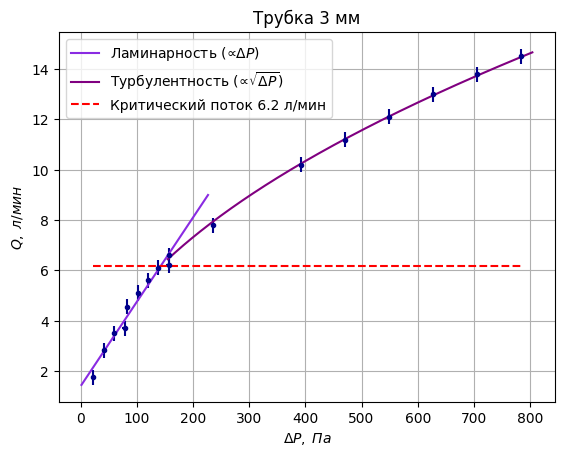

In [38]:
inter3 = findIntersection(linear, popt3, sqroot, popt3t, 100)
plt.errorbar(P3, Q3, 0.3, data3['k'] * 9.8 * 0.5, '.', color='darkblue')
plt.plot(p3, linear(p3, *popt3), color='blueviolet', label=r'Ламинарность $(\varpropto \Delta P)$')
plt.plot(p3t, sqroot(p3t, *popt3t), color='purple', label=r'Турбулентность $(\varpropto \sqrt{\Delta P})$')
plt.plot(np.linspace(P3.min(), P3.max(), 20), np.linspace(linear(inter3, *popt3), linear(inter3, *popt3), 20), '--',
         color='r', label=f'Критический поток {round(linear(inter3, *popt3)[0], 1)} л/мин')
plt.title('Трубка 3 мм')
plt.ylabel(r'$Q,\;л/мин$')
plt.xlabel(r'$\Delta P,\;Па$')
linear(inter3, *popt3)
plt.legend()
plt.grid()
plt.savefig('graphs\Q(dP)[3mm].png')

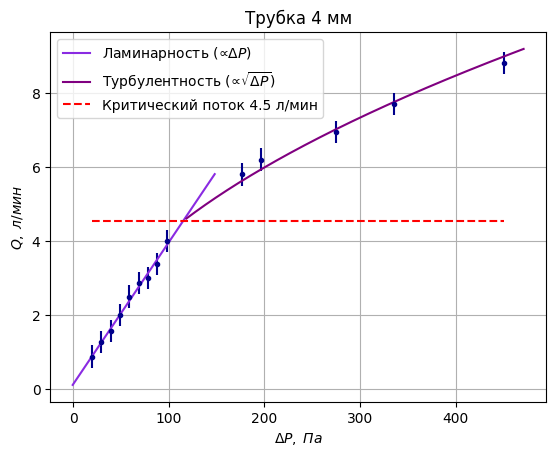

In [39]:
inter4 = findIntersection(linear, popt4, sqroot, popt4t, 100)
plt.errorbar(P4, Q4, 0.3, data4['k'] * 9.8 * 0.5, '.', color='darkblue')
plt.grid()
plt.plot(p4, linear(p4, *popt4), color='blueviolet', label=r'Ламинарность $(\varpropto \Delta P)$')
plt.plot(p4t, sqroot(p4t, *popt4t), color='purple', label=r'Турбулентность $(\varpropto \sqrt{\Delta P})$')
plt.plot(np.linspace(P4.min(), P4.max(), 20), np.linspace(linear(inter4, *popt4), linear(inter4, *popt4), 20), '--',
         color='r', label=f'Критический поток {round(linear(inter4, *popt4)[0], 1)} л/мин')
plt.title('Трубка 4 мм')
plt.ylabel(r'$Q,\;л/мин$')
plt.xlabel(r'$\Delta P,\;Па$')
plt.legend()
plt.savefig('graphs\Q(dP)[4mm].png')

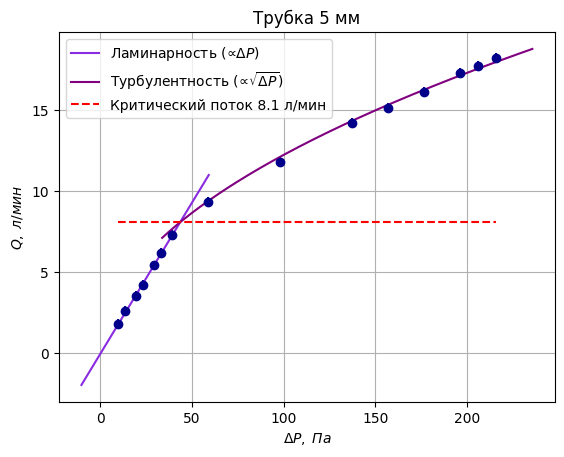

In [42]:
inter5 = findIntersection(linear, popt5, sqroot, popt5t, 100)
plt.errorbar(P5, Q5, 0.3, data5['k'] * 9.8 * 0.5, 'o', color='darkblue')
plt.grid()
plt.plot(p5, linear(p5, *popt5), color='blueviolet', label=r'Ламинарность $(\varpropto \Delta P)$')
plt.plot(p5t, sqroot(p5t, *popt5t), color='purple', label=r'Турбулентность $(\varpropto \sqrt{\Delta P})$')
plt.plot(np.linspace(P5.min(), P5.max(), 20), np.linspace(linear(inter5, *popt5), linear(inter5, *popt5), 20), '--',
         color='r', label=f'Критический поток {round(linear(inter5, *popt5)[0], 1)} л/мин')
plt.title('Трубка 5 мм')
plt.ylabel(r'$Q,\;л/мин$')
plt.xlabel(r'$\Delta P,\;Па$')
plt.legend()
plt.savefig('graphs\Q(dP)[5mm].png')

## Расчеты

По формуле Пуазейля
$$k = \frac{\pi d^4}{128 \eta l}-\ $$ угловой коэффициент наклона. Окончательно
$$\eta = \frac{\pi d^4}{128 k l};\quad\sigma_{\eta}=\sqrt{\left(\frac{\Delta l}{l}\right)^2 + 16*\left(\frac{\Delta d}{d}\right)^2 +\left(\sigma_k\right)^2}$$

In [47]:
def eta(k, d, l=0.3):
    return np.pi * (d ** 4) / 128 / (k / 60000) / l


#Рассчитанные коэффициенты
k3, k4, k5 = popt3[0], popt4[0], popt5[0]
#Рассчитанные погрешности
sk3, sk4, sk5 = np.sqrt(pcov3[0][0]), np.sqrt(pcov4[0][0]), np.sqrt(pcov5[0][0])

#Оцененные вязкости
#Длины 3мм - 20 см, 4мм - 50 см, 5 мм - 40 см
eta3, eta4, eta5 = eta(k3, 0.003, 0.2), eta(k4, 0.0039, 0.5), eta(k5, 0.00525, 0.4)
#Оцененные погрешности
se3 = eta3 * ((0.005 / 0.2) ** 2 + 16 * (0.1 / 3) ** 2 + sk3 ** 2) ** 0.5
se4 = eta4 * ((0.005 / 0.3) ** 2 + 16 * (0.1 / 3.9) ** 2 + sk4 ** 2) ** 0.5
se5 = eta5 * ((0.005 / 0.3) ** 2 + 16 * (0.1 / 5) ** 2 + sk5 ** 2) ** 0.5

n = round((eta3 + eta4 + eta5) / 3, 6)
sn = round((se3 + se4 + se5) / 3, 6)

print(f'n3 = ({round(eta3, 6)} +- {round(se3, 6)})) Па * с')
print(f'n4 = ({round(eta4, 6)} +- {round(se4, 6)})) Па * с')
print(f'n5 = ({round(eta5, 6)} +- {round(se5, 6)})) Па * с')
#Усредненное значение
print(f'n = ({n} +- {sn}) Па * с')

n3 = (1.8e-05 +- 2e-06)) Па * с
n4 = (1.8e-05 +- 2e-06)) Па * с
n5 = (1.5e-05 +- 1e-06)) Па * с
n = (1.7e-05 +- 2e-06) Па * с


Оцениваем критическое число Рейнольдса по формуле
$$Re = \frac{2Q_{кр} P_0 \mu}{\pi d RT \eta}$$

In [43]:
Q3, Q4, Q5 = (linear(inter3, *popt3) / 60000)[0], (linear(inter4, *popt4) / 60000)[0], (linear(inter5, *popt5) / 60000)[
    0]
Re3 = (2 * Q3 * 99800 * 0.029) / (np.pi * 0.003 * 8.31 * 298.65 * eta3)
Re4 = (2 * Q4 * 99800 * 0.029) / (np.pi * 0.0039 * 8.31 * 298.65 * eta4)
Re5 = (2 * Q5 * 99800 * 0.029) / (np.pi * 0.00525 * 8.31 * 298.65 * eta5)

sRe3 = Re3 * ((0.3 / Q3 / 60000) ** 2 + (0.0001 / 0.003) ** 2 + (se3 / eta3) ** 2) ** 0.5
sRe4 = Re4 * ((0.3 / Q4 / 60000) ** 2 + (0.0001 / 0.0039) ** 2 + (se4 / eta4) ** 2) ** 0.5
sRe5 = Re5 * ((0.3 / Q5 / 60000) ** 2 + (0.0001 / 0.00525) ** 2 + (se5 / eta5) ** 2) ** 0.5

print(round(Re3), '+-', round(sRe3))
print(round(Re4), '+-', round(sRe4))
print(round(Re5), '+-', round(sRe5))

1432 +- 212
811 +- 102
1268 +- 116


# Зависимость $\Delta P(x)$

In [58]:
px3 = pd.read_csv('dP(x)[3mm, Q=1.4].csv')
px4 = pd.read_csv('dP(x)[4mm, Q=X].csv')
px5 = pd.read_csv('dP(x)[5mm, Q=1.6].csv')

px3['p'] = px3['k'] * px3['dl'] * 9.8
px3 = px3.sort_values(by=['p'])
p3, x3 = px3['p'], px3['dx']

px4['p'] = px4['k'] * px4['dl'] * 9.8
px4 = px4.sort_values(by=['p'])
p4, x4 = px4['p'], px4['dx']

px5['p'] = px5['k'] * px5['dl'] * 9.8
px5 = px5.sort_values(by=['p'])
p5, x5 = px5['p'], px5['dx']

## Аппроксимация

In [59]:
x3a = np.linspace(x3.min(), x3.max(), 100)
popt_px3, pcov_px3 = curve_fit(linear, x3[1:], p3[1:])

x4a = np.linspace(x4.min(), x4.max(), 100)
popt_px4, pcov_px4 = curve_fit(linear, x4, p4)

x5a = np.linspace(x5.min(), x5.max(), 100)
popt_px5, pcov_px5 = curve_fit(linear, x5[2:], p5[2:])

C:\Users\timbe\PycharmProjects\1proj1\venv\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


TypeError: Improper input: func input vector length N=2 must not exceed func output vector length M=1

In [46]:
linear(70, *popt_px3) / 0.2 / 9.8

25.785388125017576

## Графики

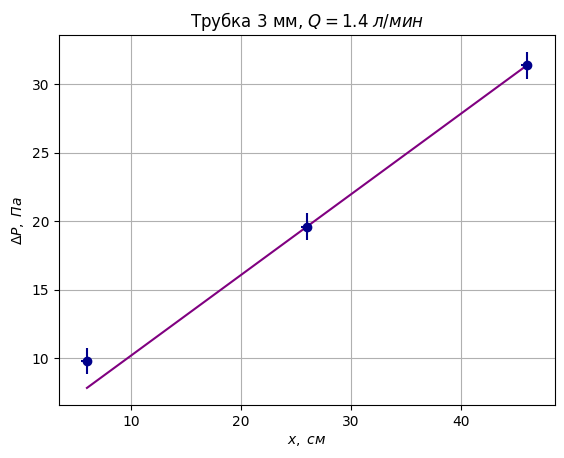

In [59]:
plt.title(r'Трубка 3 мм, $Q = 1.4\;л/мин$')
plt.grid()
plt.xlabel(r'$x,\;см$')
plt.ylabel(r'$\Delta P,\;Па$')
plt.errorbar(x3, p3, 9.8 * px3['k'] / 2, 0.5, 'o', color='darkblue')
plt.plot(x3a, linear(x3a, *popt_px3), color='purple')
plt.savefig('graphs/dP(x)[3mm, Q=1.4].png')
plt.show()

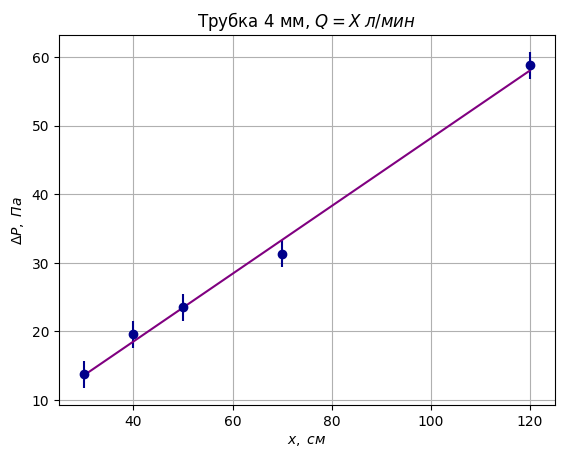

In [54]:
plt.title(r'Трубка 4 мм, $Q = X\;л/мин$')
plt.grid()
plt.xlabel(r'$x,\;см$')
plt.ylabel(r'$\Delta P,\;Па$')
plt.errorbar(x4, p4, 9.8 * px4['k'], 0.5, 'o', color='darkblue')
plt.plot(x4a, linear(x4a, *popt_px4), color='purple')
plt.savefig('graphs/dP(x)[4mm, Q=X].png')
plt.show()

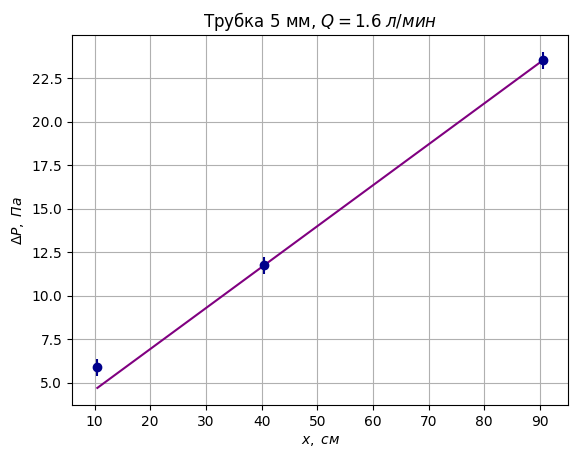

In [60]:
plt.title(r'Трубка 5 мм, $Q = 1.6\;л/мин$')
plt.grid()
plt.xlabel(r'$x,\;см$')
plt.ylabel(r'$\Delta P,\;Па$')
plt.errorbar(x5, p5, 9.8 * px5['k'] / 4, 0.5, 'o', color='darkblue')
plt.plot(x5a, linear(x5a, *popt_px5), color='purple')
plt.savefig('graphs/dP(x)[5mm, Q=1.6].png')
plt.show()

# Зависимость потока от радиуса

In [70]:
a10 = pd.read_csv('10(a).csv')
r = a10['diameter'] / 2
Qrl = a10['Q']
lnr = np.log(r)
lnQ = np.log(Qrl)
a10

,diameter,k,l,dl,Q
0,0.00525,0.2,40.5,15,2.9
1,0.00300,0.2,46.0,18,1.6
2,0.00390,0.2,41.0,16,1.2


In [66]:
popt10a, pcov10a = curve_fit(linear, lnr, lnQ)
lnrr = np.linspace(lnr.min(), lnr.max(), 100)
popt10a

array([1.10472375, 7.45289275])

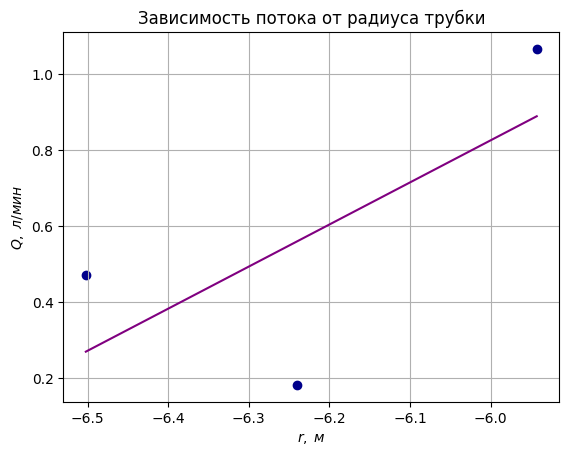

In [69]:
plt.title(r'Зависимость потока от радиуса трубки')
plt.grid()
plt.xlabel(r'$r,\;м$')
plt.ylabel(r'$Q,\;л/мин$')
plt.scatter(lnr, lnQ, color='darkblue')
plt.plot(lnrr, linear(lnrr, *popt10a), color='purple')
plt.savefig('graphs/lnQ(lnr).png')
plt.show()